# Voorbeelden team Euler

Hierin komen per procedure uit `procedures.py` enkele illustratieve voorbeelden met wat toelichting. Ook procedures die nog niet werken horen hier thuis, aangezien we dan met een voorbeeld het probleem kunnen aantonen.

Per hoofding kan je een tussentitel aanmaken door in een markdown-cel `###Tussentitel` te typen. De naam van de functie kan dan tussen `` worden gezet.

In [121]:
from procedures import *
import matplotlib.pyplot as plt

### De procedure `xsample(n,a,b)`

Deze functie genereert een vector (ndarray) van lengte n met uniform verdeelde getallen tussen a en b.

In [122]:
# creëer een vector met 30 x-waarden tussen 0 en 20
xVector = xsample(30,0,20)

print(xVector)

[ 9.94685505 16.86800754 14.1789324  15.79977387 13.71427761  5.77922542
  6.12749269 17.80816445 12.44547939 11.53646407  6.50810789  1.78262362
  9.08381785  8.58805313  9.97656956  8.92444739  5.73828689 15.10610402
 15.88188647  1.92714161  0.59433132  7.66539664  6.53759302  5.52642102
 10.03692418 14.53896089  9.10509778  9.79244418 18.6427455   8.78638913]


### De procedure `ysample(x,f,e)`

Deze functie genereert een vector (ndarray) van dezelfde lengte als vector x volgens de formule $y=f(x)+r$ met r normaal verdeelde getallen met gemiddelde nul en standaarddeviatie e.

In [123]:
# een parabolische functie ter illustratie
# we gaan ons op deze functie baseren om de datapunten te genereren
# vervolgens gaan we aan de functiewaarden een error-term toevoegen
def f(x):
    return x**2

# creëer een vector met 20 y-waarden zodat bij de functiewaarden van de parabolische functie een error-term epsilon wordt toegevoegd
# deze epsilon-term is een random getal tussen -e en e en de error-termen hebben een gemiddelde van 0
# hoe groter de epsilon (e), hoe groter de spreidin/afwijking van de punten rond de parabool
# de gemiddelde afstand van alle punten tot de parabool blijft echter 0
yVector = ysample(xVector, f, e=30)

print(yVector)

[ 65.8243362  373.87689857 211.19577168 280.51647288 188.66828519
  48.33161922  95.8889601  323.20563494 198.91244942  77.72546434
  44.30414759  27.39085859   6.67673433  31.97787203  60.31739406
  39.6523833   99.66523014 203.41563843 298.11710849 -21.55539167
  10.14503403  51.71558654  41.88892963  55.0127432   78.99748264
 191.49436343  80.69706502  87.75629644 308.35768562 110.58459541]


### De procedure `ols(y,x)`

Deze functie berekent de Ordinary Least Squares (OLS) regressierechte bij gegeven vectoren y en x. De functie geeft een koppel (a,b) terug zodat $y = a*x + b$ de regressierechte is. Hierbij komt a overeen met $β_1$ en b met $β_0$ (zie pagina 71 van ISL, waar $y = β_1*x + β_0$).

In [124]:
# genereer een koppel (a,b)
# dit komt eigenlijk overeen met een koppel (beta1, beta0)
(a,b) = ols(yVector, xVector)

# print de helling en de intercept op 3 decimalen nauwkeurig
print("%.3f is de helling van de OLS regressielijn (a = beta1)" % a)
print("%.3f is de intercept van de OLS regressielijn (b = beta0)" % b, end="\n\n")

# de functie f^ (f met een hoedje)
def geschatteFunctie(x):
    return a*x + b

# druk het voorschrift van onze geschatte functie af
import sympy as sp
x = sp.symbols('x')
print(f"Functievoorschrift schattingsfunctie:\t\t\t{geschatteFunctie(x)}")

# schat de functiewaarde van x=4 en x=15 op basis van onze geschatte functie
print(f"Voorspelde functiewaarde voor x=2 via OLS regressie:\t{geschatteFunctie(4)}")
print(f"Voorspelde functiewaarde voor x=10 via OLS regressie:\t{geschatteFunctie(15)}")

19.881 is de helling van de OLS regressielijn (a = beta1)
-75.757 is de intercept van de OLS regressielijn (b = beta0)

Functievoorschrift schattingsfunctie:			19.8812993101386*x - 75.7572435514318
Voorspelde functiewaarde voor x=2 via OLS regressie:	3.7679536891225496
Voorspelde functiewaarde voor x=10 via OLS regressie:	222.46224610064712


### De procedure `knn(x0,y,x,k)`

Deze functie berekent de voorspelling(en) in x0 volgens *__enkelvoudige__* KNN-regressie bij gegeven regressor x en respons y (ndarray).

In [125]:
# We voorspellen de y-waarden in de punten x=4 en x=10 op basis van de 3 dichtste buren.
voorspeldeFunctiewaardenKnn = knn(np.array([4,10]),yVector,xVector,3)
print(f"Voorspelde functiewaarden voor x=4 en x=10 via KNN: {voorspeldeFunctiewaardenKnn}")

Voorspelde functiewaarden voor x=4 en x=10 via KNN: [67.66986418 68.37973763]


### Tussentijdse visualisatie

Hieronder een visuele voorstelling van de resultaten in bovenstaande functies:

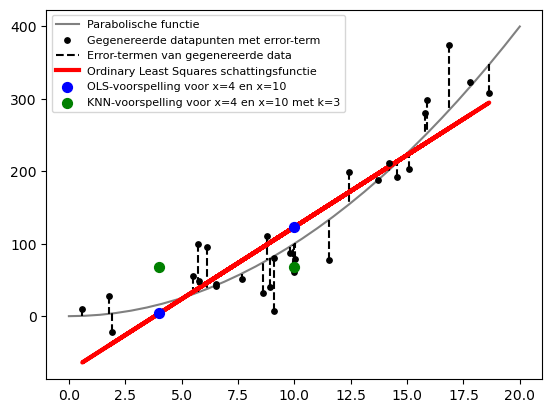

In [126]:
import numpy as np
plt.figure()
plt.plot(np.linspace(0, 20, 30), f(np.linspace(0, 20, 30)), color='grey', label="Parabolische functie")
plt.scatter(xVector, yVector, c='k', s=15, label="Gegenereerde datapunten met error-term", zorder=3)
plt.vlines(xVector, yVector, f(xVector), colors='black', linestyles='dashed', label="Error-termen van gegenereerde data")
plt.plot(xVector, geschatteFunctie(xVector),'r-', lw=3 ,label="Ordinary Least Squares schattingsfunctie")
plt.scatter([4,10],[geschatteFunctie(4),geschatteFunctie(10)], c='blue', label="OLS-voorspelling voor x=4 en x=10", s=50,zorder=5)
plt.scatter([4,10],voorspeldeFunctiewaardenKnn, c='green', label="KNN-voorspelling voor x=4 en x=10 met k=3", s=50,zorder=5)
plt.legend(fontsize="8")
plt.show()

### De procedure `mknn(x0,y,x,k)`

Deze functie berekent de voorspelling(en) in x0 volgens *__meervoudige__* KNN-regressie bij gegeven regressor x (matrix met punten met meerdere x-waarden) en respons y (ndarray).

In [127]:
x1 = xsample(20, 0, 1)
x2 = xsample(20, 0, 1)

xMatrix = np.column_stack((x1, x2))
x0Matrix = np.column_stack(([1, 2, 3], [3, 2, 1]))

y = ysample(1+x1+x2, f)

print("Voorspellingen in de punten (1,2), (2,2) en (3,1) met meervoudige KNN-regressie:")
print(mknn(x0Matrix, y, xMatrix, 3))

Voorspellingen in de punten (1,2), (2,2) en (3,1) met meervoudige KNN-regressie:
[5.49803577 6.16005148 4.64831554]


### De procedure `mls(y,x)`

Deze functie genereert een vector beta zodat $y=X*beta$ het kleinste kwadratenhypervlak is bij gegeven matrix X en responsvector Y (ndarray).

In [128]:
# x_i1
xVector1 = xsample(20,0,1)
# x_i2
xVector2 = xsample(20,0,1)

def f(x):
    return x

yVector = ysample(1+xVector1+xVector2,f)

# we voegen een kolom met eentjes toe aan onze matrix
xMatrix = np.column_stack((np.ones(len(xVector1)),xVector1, xVector2))

beta = mls(yVector,xMatrix)
print(f"Beta: {beta}")

Beta: [1.6836725  0.64198356 0.15317371]


### De procedure `berekenKOpt(trainingX,trainingY,validatieX,validatieY,enkelvoudig)`

Deze functie berekent de optimale K-waarde $K_{\text{opt}}$ voor enkelvoudige en meervoudige KNN-regressie.

#### Enkelvoudige regressie

Hierbij is de laatste parameter `enkelvoudig` gelijk aan `True`.

In [129]:
trainingX = xsample(20,0,1)
trainingY = ysample(trainingX,f)

validatieX = xsample(1000,0,1)
validatieY = ysample(validatieX,f)

kOptEnkv = berekenKOpt(trainingX,trainingY,validatieX,validatieY,True)
print("De optimale K-waarde bij meervoudige regressie: " + str(kOptEnkv))

De optimale K-waarde bij meervoudige regressie: 13


#### Meervoudige regressie

Hierbij is de laatste parameter `enkelvoudig` gelijk aan `False`.

In [130]:
trainingX1 = xsample(20,0,1)
trainingX2 = xsample(20,0,1)

validatieX1 = xsample(1000,0,1)
validatieX2 = xsample(1000,0,1)

trainingXMatrix = np.column_stack((trainingX1, trainingX2))
validatieXMatrix = np.column_stack((validatieX1, validatieX2))

trainingY = ysample(trainingX1+trainingX2,f)
validatieY = ysample(validatieX1+validatieX2,f)

kOptMeerv = berekenKOpt(trainingXMatrix,trainingY,validatieXMatrix,validatieY,False)
print("De optimale K-waarde bij meervoudige regressie: " + str(kOptMeerv))

De optimale K-waarde bij meervoudige regressie: 10


### De procedure `berekenPOpt(trainingX,trainingY,validatieX,validatieY)`

Deze functie berekent de optimale p-waarde voor polynomiale regressie.

In [131]:
def f(x):
    return 10**x

trainingX = xsample(20,0,1)
trainingY = ysample(trainingX,f)

validatieX = xsample(1000,0,1)
validatieY = ysample(validatieX,f)

pOpt = berekenPOpt(trainingX,trainingY,validatieX,validatieY)

print(f"{pOpt} is de optimale graad voor polynomiale regressie.")

2 is de optimale graad voor polynomiale regressie.


### De procedure `coefficienten(beta,xx)`

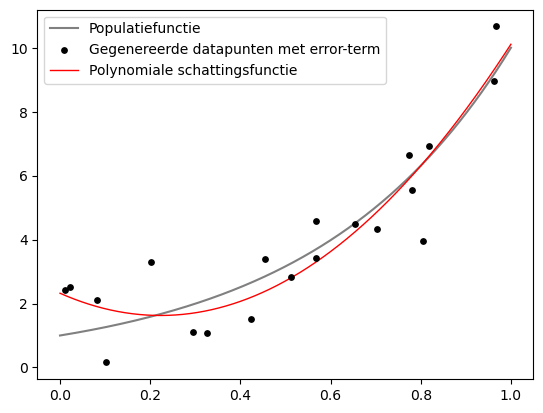

In [132]:
# Populatiefunctie
def f(x):
    return 10**x

trainingX = xsample(20,0,1)
trainingY = ysample(trainingX,f)
X = np.column_stack([trainingX**i for i in range(pOpt+1)])
beta = mls(trainingY,X)
xx = np.linspace(0,1,1000)

# we geven de vector beta mee, alsook de x-waarden waarvoor we de coeffecienten willen berekenen
coef = coefficienten(beta,xx)

polynomValidatieVoorspelling = np.dot(coef, beta)

plt.figure()
plt.plot(xx, f(xx), color='grey', label="Populatiefunctie")
plt.scatter(trainingX, trainingY, c='k', s=15, label="Gegenereerde datapunten met error-term", zorder=3)
plt.plot(xx,polynomValidatieVoorspelling,'r-', lw=1 ,label="Polynomiale schattingsfunctie")
plt.legend()
plt.show()